In [1]:
import numpy as np
import pandas as pd
import re
import itertools

import imageio
import imagesc

import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage import measure
from skimage.transform import resize
import skimage.io
from skimage.io import imsave
from skimage.measure import label, regionprops_table, regionprops

import cv2 as cv
from typing import List
import tifffile as tiff

from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

In [4]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [5]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 6/'

In [7]:
conditions = pd.read_csv(file_path + 'BMP-BC1_signaling_memory_conditions.csv')
conditions

,No,cell_line,recording time (Days),chasing time (Days),restimulation (Days),Dox (ng/ml )
0,1,RM1_dBMPRsg16_1,3,3,3,500
1,2,RM1_dBMPRsg16_6,3,3,0,500
2,3,RM1_dBMPRsg16_2,3,6,3,500
3,4,RM1_dBMPRsg16_7,3,6,0,500
4,5,RM1_dBMPRsg16_3,3,9,3,500
5,6,RM1_dBMPRsg16_8,3,9,0,500
6,7,RM1_dBMPRsg16_4,3,12,3,500
7,8,RM1_dBMPRsg16_9,3,12,0,500
8,9,RM1_dBMPRsg16_5,3,15,3,500
9,10,RM1_dBMPRsg16_10,3,15,0,500


# The Maximum intensity projected(max) and segemented masks(mask) for each channel used for following intensity measurement
    path_647mask = data_dir + 'ch2_mask/' + re.split('/', f)[-1][0:-4] + '_ch2_Probabilities.tif'
    path_546mask = data_dir + 'ch3_mask/' + re.split('/', f)[-1][0:-4] + '_ch3_Probabilities.tif'
    path_DAPImask = data_dir + 'ch4_mask_GPU/' + re.split('/', f)[-1][0:-4] + '_ch4_cp_masks.png'
    
    path_CFPmax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch1.tif'
    path_647max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch2_rolling_50.tif'
    path_546max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch3_rolling_50.tif'
    path_DAPImax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch4.tif'

In [51]:
sc_df = pd.read_csv(data_path + 'BMP-BC1_signaling_memory&spatial.csv')
sc_df

,No,cell_line,position,cell_label,cell_x,cell_y,Dox (ng/ml ),recording time (Days),chasing time (Days),restimulation (Days),...,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum,Fov
0,1,RM1_dBMPRsg16_1,1,2,1496.105164,66.823163,500,3,3,3,...,0.026356,1.929259,-0.577160,0.487385,-59.711989,2.373744,0.174757,5.205775,2,1_1
1,1,RM1_dBMPRsg16_1,1,3,1398.794922,101.690409,500,3,3,3,...,0.106000,9.956135,-2.054161,1.658984,-65.941982,1.367663,1.281771,76.521915,3,1_1
2,1,RM1_dBMPRsg16_1,1,5,1666.254686,97.727590,500,3,3,3,...,0.102904,9.816616,-2.152971,1.486299,-56.366655,1.045791,0.603973,47.154930,3,1_1
3,1,RM1_dBMPRsg16_1,1,6,627.274627,93.703692,500,3,3,3,...,0.051630,7.512310,-6.108187,1.164768,-16.514202,0.590520,0.151058,22.153387,4,1_1
4,1,RM1_dBMPRsg16_1,1,7,289.595864,165.539814,500,3,3,3,...,0.019432,2.764495,-6.742129,0.421640,-5.106216,0.454796,0.154691,27.771765,3,1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20772,21,RM1_dBMPRsg16_0,7,139,27.671940,1903.326280,0,0,0,0,...,0.050924,6.575353,-5.996141,0.508647,-5.998325,0.780139,0.033662,3.051103,2,21_7
20773,21,RM1_dBMPRsg16_0,7,140,918.215792,1940.878930,0,0,0,0,...,0.029470,4.033590,-6.261953,0.681233,-8.882599,0.524147,0.090478,14.094364,3,21_7
20774,21,RM1_dBMPRsg16_0,7,141,1049.295266,1935.965625,0,0,0,0,...,0.032320,4.896500,-7.407434,0.380875,-4.198255,0.423193,0.098827,19.067442,3,21_7
20775,21,RM1_dBMPRsg16_0,7,142,1458.537593,1979.385390,0,0,0,0,...,0.010802,1.221409,-5.278382,0.872680,-11.690659,0.684169,0.230972,23.871532,2,21_7


In [41]:
cell_counts = sc_df.groupby('No', as_index=False).size()
cell_counts

,No,size
0,1,852
1,2,969
2,3,598
3,4,726
4,5,1315
5,6,934
6,7,1186
7,8,1031
8,9,1580
9,10,1180


In [42]:
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

# Fig S5C

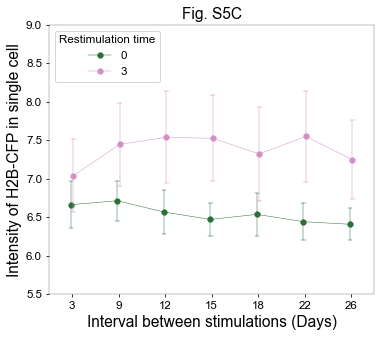

In [43]:
custom_palette = sns.color_palette("cubehelix", 2)

temp_df = sc_df.loc[sc_df['No'].isin([1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])].copy()

plt.figure(figsize=(6, 5), dpi=70)

# Plot mean points with error bars representing standard deviation
sns.pointplot(x='chasing  time (Days)', 
              y='lnCFP', 
              data=temp_df, 
              hue='restimulation (Days)', 
              palette=custom_palette,
              errorbar = 'sd',
              linewidth = 0.5,
              markersize = 6,
              capsize=0.1,
              dodge=True
             )

plt.title('Fig. S5C')
plt.xlabel('Interval between stimulations (Days)')
plt.ylabel('Intensity of H2B-CFP in single cell')
plt.ylim(5.5, 9)
plt.legend(title='Restimulation time', bbox_to_anchor=(0, 1), loc='upper left')
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
plt.grid(False)
#save_path = os.path.join(data_dir, f'240402_26days_dBMPRsg16_memory_chasing_CFP.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig S5D

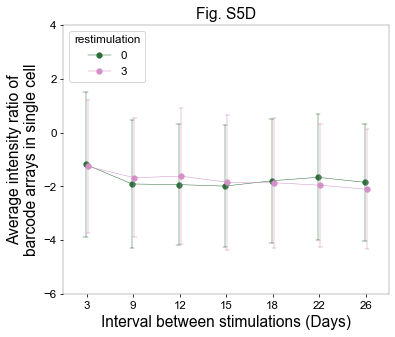

In [44]:
custom_palette = sns.color_palette("cubehelix", 2)

temp_df = sc_df.loc[sc_df['No'].isin([1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])].copy()

plt.figure(figsize=(6, 5), dpi=70)

# Plot mean points with error bars representing standard deviation
sns.pointplot(x='chasing  time (Days)', 
              y='int_diff mean', 
              data=temp_df, 
              hue='restimulation (Days)', 
              palette=custom_palette,
              errorbar = 'sd',
              linewidth = 0.5,
              markersize = 6,
              dodge = True,
              capsize=0.1
             )

plt.title('Fig. S5D')
plt.xlabel('Interval between stimulations (Days)')
plt.ylabel('Average intensity ratio of\nbarcode arrays in single cell')
plt.ylim(-6 , 4)
plt.legend(title='restimulation', bbox_to_anchor=(0, 1), loc='upper left')
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
plt.grid(False)
#save_path = os.path.join(data_dir, f'240402_26days_dBMPRsg16_memory_chasing_int_diff.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig 6C

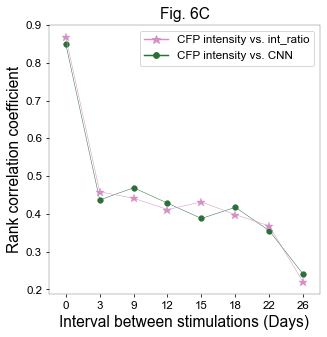

In [50]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Create a MinMaxScaler
scaler = MinMaxScaler()

selected_conditions = [1, 5, 7, 9, 11, 13, 15, 19]
custom_palette = sns.color_palette("cubehelix", 5)

correlations_int_ratio = []
correlations_mout_avg = []

for i in selected_conditions:
    temp_df = sc_df.loc[((sc_df['No'] == i)) & ((sc_df['barcode_number sum'] >2))].copy()
    
    # Scale the columns
    #temp_df[['lnCFP', 'int_ratio mean', 'mout avg mean']] = scaler.fit_transform(temp_df[['lnCFP', 'int_ratio mean', 'mout avg mean']])
    
    # Calculate the ranked correlation for int_ratio mean
    ranked_corr_int_ratio = spearmanr(temp_df['lnCFP'], temp_df['int_ratio mean']).correlation
    correlations_int_ratio.append((i, temp_df['chasing  time (Days)'].iloc[0], ranked_corr_int_ratio))
    
    # Calculate the ranked correlation for mout avg mean
    ranked_corr_mout_avg = spearmanr(temp_df['lnCFP'], temp_df['mout avg mean']).correlation
    correlations_mout_avg.append((i, temp_df['chasing  time (Days)'].iloc[0], ranked_corr_mout_avg))

correlations_int_ratio_df = pd.DataFrame(correlations_int_ratio, columns=['No', 'TimePoint', 'RankedCorrelationIntRatio'])
correlations_mout_avg_df = pd.DataFrame(correlations_mout_avg, columns=['No', 'TimePoint', 'RankedCorrelationMoutAvg'])

plt.figure(figsize=(5, 5), dpi=70)
#plt.ylim(0, 1)
#sns.set(style="whitegrid")
sns.pointplot(data=correlations_mout_avg_df, x='TimePoint', y='RankedCorrelationMoutAvg', color= custom_palette[1], marker='o',linewidth = 0.5,markersize = 6)
sns.pointplot(data=correlations_int_ratio_df, x='TimePoint', y='RankedCorrelationIntRatio', color= custom_palette[3], marker='*',linewidth = 0.5,markersize = 9)

plt.title('Fig. 6C')
plt.xlabel('Interval between stimulations (Days)')
plt.ylabel('Rank correlation coefficient')
#plt.title('Ranked Correlation between lnCFP and int_ratio mean / mout avg mean vs. Time Point for Selected Conditions')
# Create custom legend
legend_labels = ['CFP intensity vs. int_ratio', 'CFP intensity vs. CNN']
legend_handles = [plt.Line2D([0], [0], marker='*', color= custom_palette[3], markerfacecolor= custom_palette[3], markersize=9),
                  plt.Line2D([0], [0], marker='o', color=custom_palette[1], markerfacecolor=custom_palette[1], markersize=6)]
plt.legend(legend_handles, legend_labels)

plt.grid(False)
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
#save_path = os.path.join(data_dir, f'240402_0423_dWntRsg21_memory_chasing_Ranked Correlation between lnCFP and editing.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig 6E

In [32]:
sc_df['Fov'] = sc_df['No'].astype(str) + '_' + sc_df['position'].astype(str)

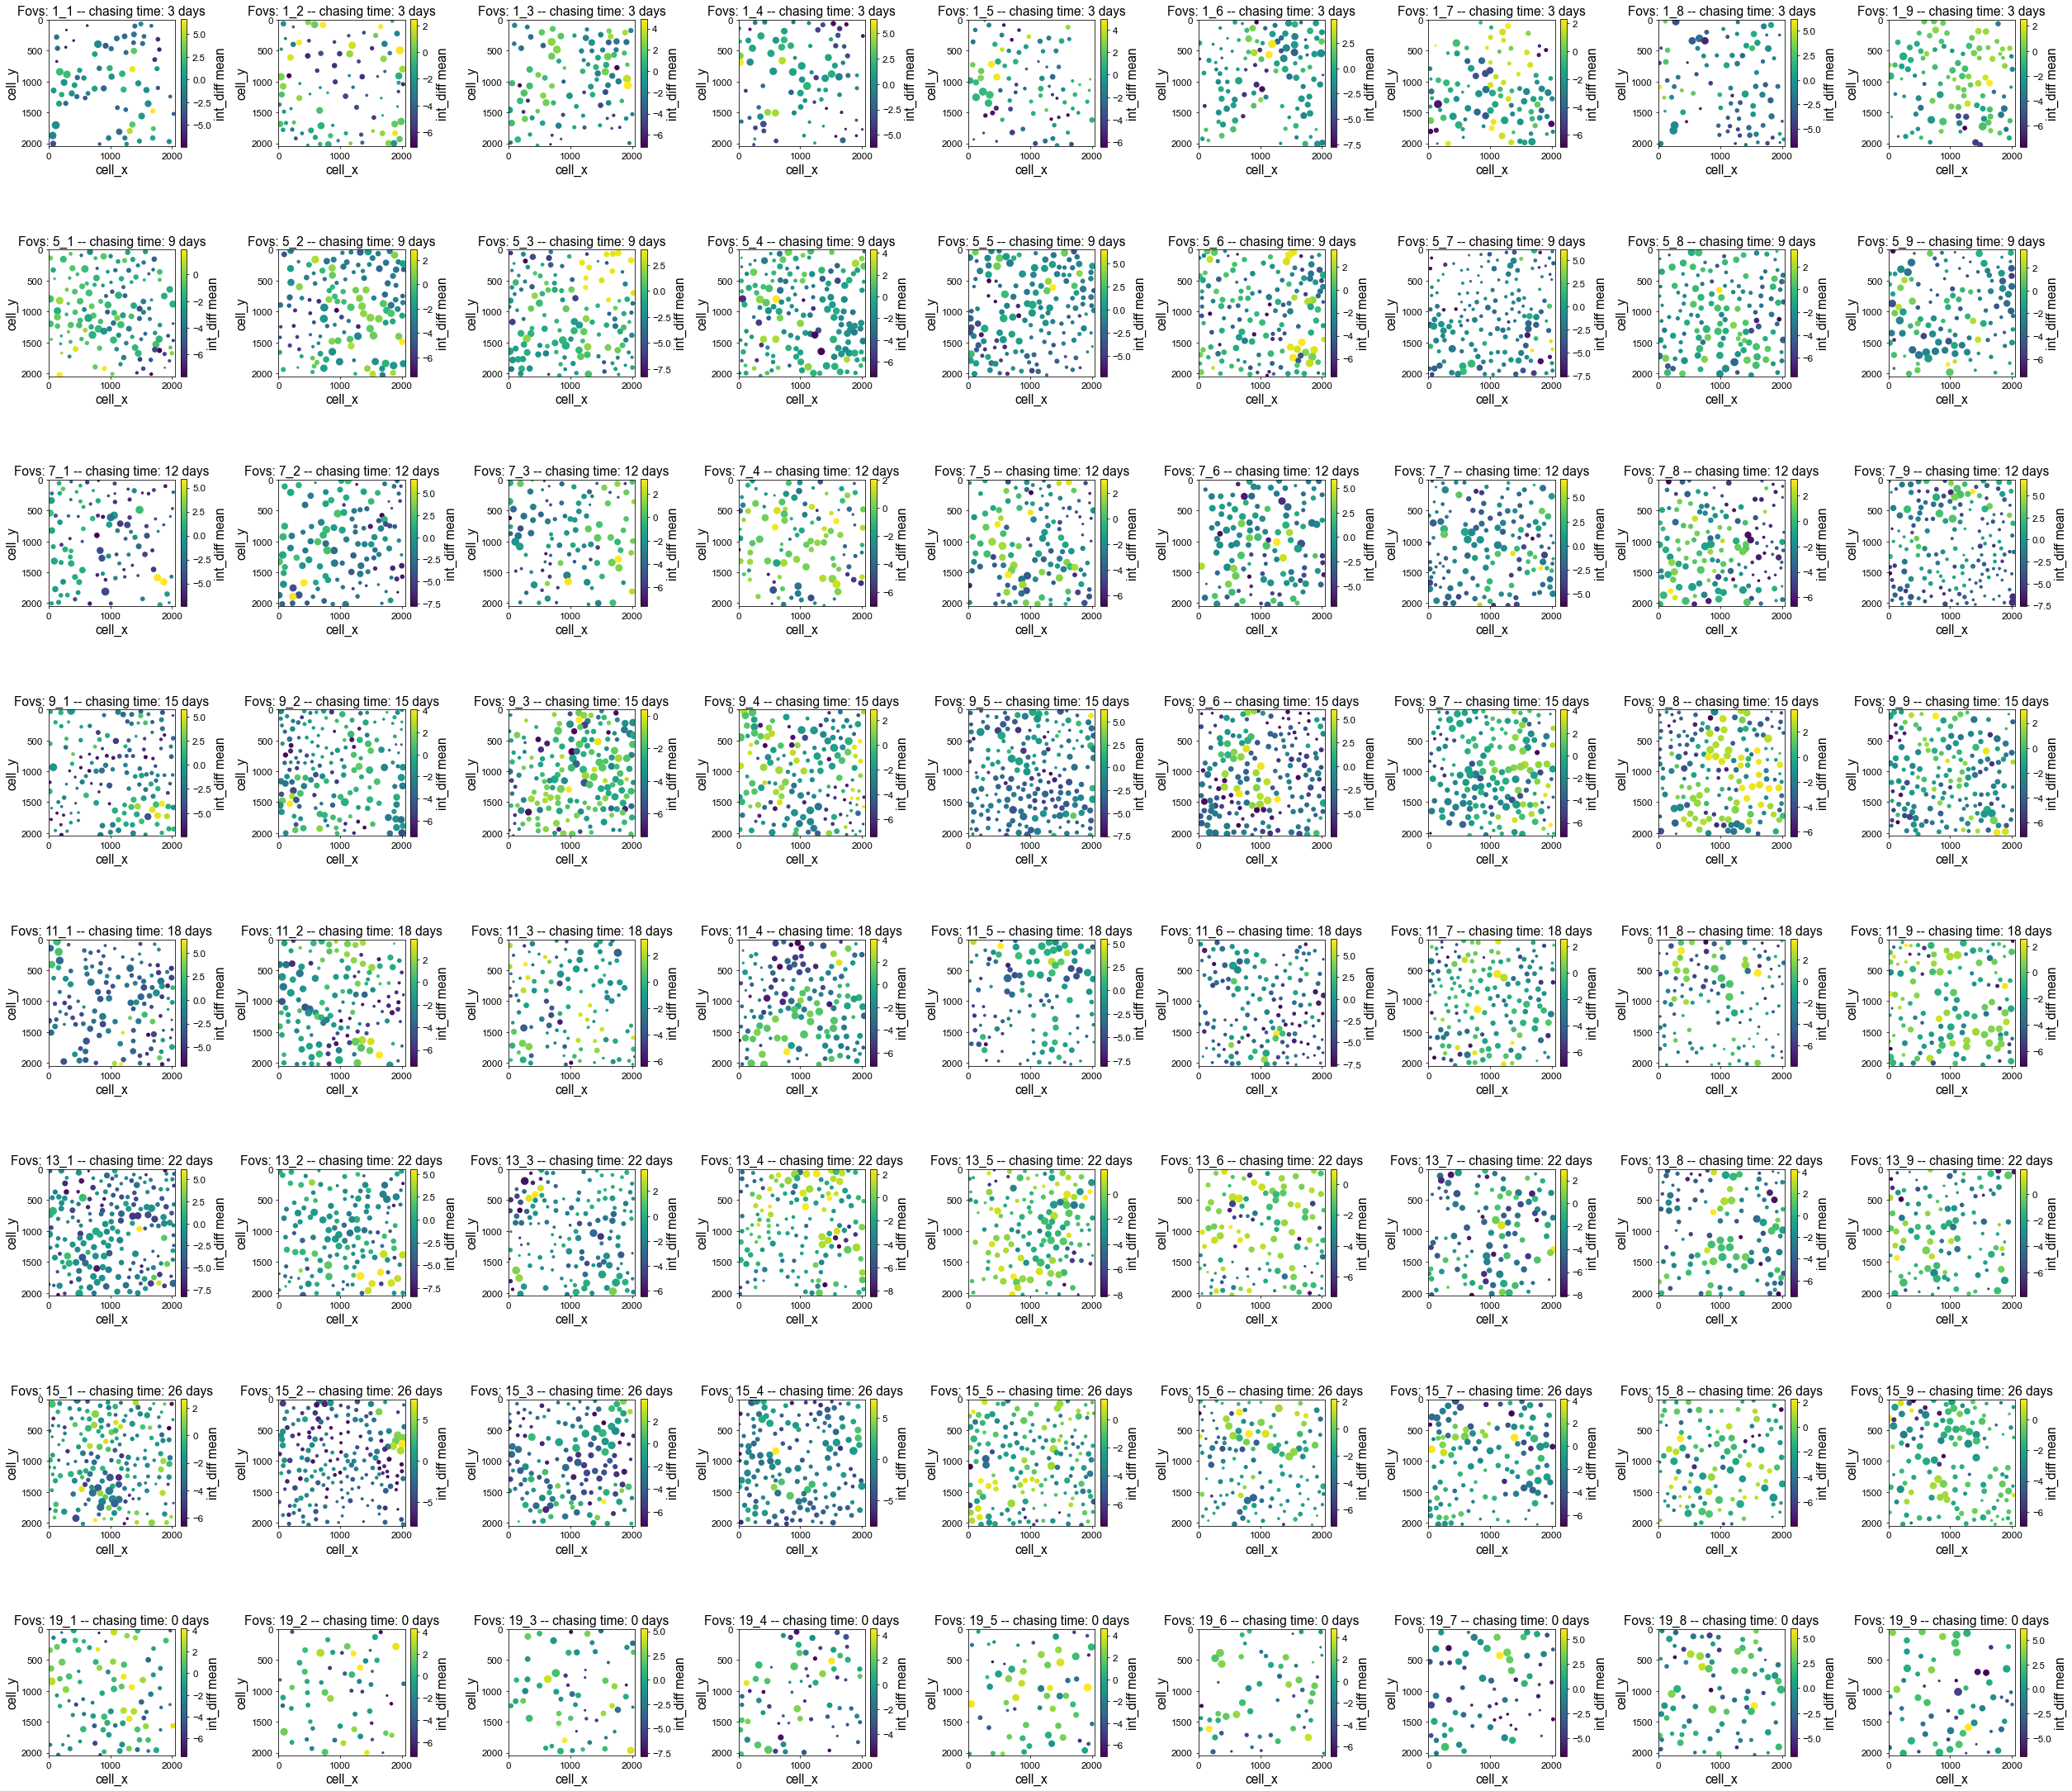

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm

cells = [19, 1, 5, 7, 9, 11, 13, 15]
sub_df = sc_df.loc[sc_df['No'].isin(cells)].copy()
Fovs = sub_df['Fov'].unique()

intmin = sub_df['int_diff mean'].min()
intmax = sub_df['int_diff mean'].max()
cfpmin = sub_df['lnCFP'].min()
cfpmax = sub_df['lnCFP'].max()

# Define the colormap
cmap = cm.get_cmap('viridis')

# Calculate the number of rows needed
num_plots = len(Fovs)
num_cols = 9
num_rows = int(np.ceil(num_plots / num_cols))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(36, num_rows * 4), dpi=70)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each No_Position pair and generate plots
for i, pos in enumerate(Fovs):
    temp_df = sub_df.loc[sub_df['Fov'] == pos].copy()
    
    # Normalize the 'mout avg mean' values to control the size of the dots
    size_min = 10  # Minimum dot size
    size_max = 100  # Maximum dot size
    norm_size = (temp_df['lnCFP'] - temp_df['lnCFP'].min()) / (temp_df['lnCFP'].max() - temp_df['lnCFP'].min())
    sizes = size_min + norm_size * (size_max - size_min)
    
    # Create a scatter plot on the current axis
    scatter = axes[i].scatter(
        data=temp_df,
        x='cell_x',
        y='cell_y',
        c='int_diff mean',
        cmap=cmap,
        edgecolor='none',
        s=sizes,  # Dot size based on 'mout avg mean'
        vmin=temp_df['int_diff mean'].min(),
        vmax=temp_df['int_diff mean'].max()
    )
    
    cbar = plt.colorbar(scatter, ax=axes[i], fraction=0.046, pad=0.04, shrink=0.7)
    cbar.set_label('int_diff mean')
    
    axes[i].set_xlabel('cell_x')
    axes[i].set_ylabel('cell_y')
    axes[i].set_aspect('equal')
    # invert yaxis to set the origin [0,0] as the left top corner, which match to the coordinate system of cellpose exported DAPI mask
    axes[i].invert_yaxis()
    axes[i].set_ylim([2048, 0])
    axes[i].set_xlim([0, 2048])

    # Extract the chasing time
    chasing_time = temp_df['chasing  time (Days)'].iloc[0]

    # Set the title for the current plot
    axes[i].set_title(f'Fovs: {pos} -- chasing time: {chasing_time} days')

# Hide any unused axes if the number of plots is not a multiple of num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make it tight
plt.tight_layout()
plt.show()

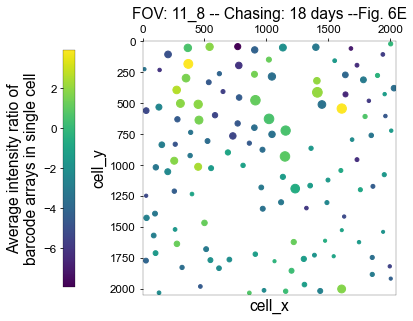

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm
import os

# Define parameters
Fovs = ['11_8']
sub_df = sc_df.loc[sc_df['Fov'].isin(Fovs)].copy()

# Define intensity and CFP min/max values
#intmin = sub_df['int_diff mean'].min()
#intmax = sub_df['int_diff mean'].max()
#cfpmin = sub_df['lnCFP'].min()
#cfpmax = sub_df['lnCFP'].max()

# Define the colormap
cmap = cm.get_cmap('viridis')

# Set up the plot
fig, axes = plt.subplots(len(Fovs), 1, figsize=(6, 6), dpi=70, squeeze=False)

# Loop through each FOV and generate plots
for i, Fov in enumerate(Fovs):
    temp_df = sub_df.loc[sub_df['Fov'] == Fov].copy()
    
    # Normalize the 'lnCFP' values for dot sizes
    size_min, size_max = 10, 100
    norm_size = (temp_df['lnCFP'] - temp_df['lnCFP'].min()) / (temp_df['lnCFP'].max() - temp_df['lnCFP'].min())
    sizes = size_min + norm_size * (size_max - size_min)
    
    # Create a scatter plot on the current axis
    scatter = axes[i, 0].scatter(
        x=temp_df['cell_x'],
        y=temp_df['cell_y'],
        c=temp_df['int_diff mean'],
        cmap=cmap,
        #edgecolor='black',
        #linewidths=0.25,  
        s=sizes,  # Dot size based on 'lnCFP'
        vmin=temp_df['int_diff mean'].min(),
        vmax=temp_df['int_diff mean'].max()
    )
    
    # Add colorbar with customized line width
    cbar = plt.colorbar(scatter, ax=axes[i, 0], fraction=0.046, pad=0.2, shrink=0.6, location='left')
    cbar.set_label('Average intensity ratio of\nbarcode arrays in single cell')
    
    # Set the color bar outline line width
    cbar.outline.set_linewidth(0.25)  # Adjust line width as desired
    
    # Set labels and axis properties
    axes[i, 0].set_xlabel('cell_x')
    axes[i, 0].set_ylabel('cell_y')
    axes[i, 0].set_aspect('equal')
    
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_ylim([2048, 0])
    axes[i, 0].set_xlim([0, 2048])
    # Set x-axis tick labels and label at the top
    axes[i, 0].xaxis.set_ticks_position('top')     # Move ticks to the top
    
    # Adjust the plot's aesthetics for the spines
    for spine in axes[i, 0].spines.values():
        spine.set_linewidth(0.25)

    # Set the title with chasing time
    chasing_time = temp_df['chasing  time (Days)'].iloc[0]
    axes[i, 0].set_title(f'FOV: {Fov} -- Chasing: {chasing_time} days --Fig. 6E')

# Adjust layout and save figure
fig.tight_layout()
#save_path = os.path.join(data_dir, '240402_BMP_memory_spatial_chasing_18.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()
